# Running a PSM without calibration

In some cases, we may need to run a PSM that cannot be calibrated with instrumental observations due to non-overlapping timespan.
This tutorial shows how to specify the required paramters and run a PSM without calling the calibration step.

In [3]:
%load_ext autoreload
%autoreload 2

import cfr
import pandas as pd
import numpy as np
import os

import os
os.chdir('/glade/u/home/fengzhu/Github/cfr/docsrc/notebooks/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data preparation

### Proxy

In [4]:
df = pd.read_pickle('./data/pages2k_updated_Palmyra_dataset.pkl')
pdb = cfr.ProxyDatabase().from_df(df)

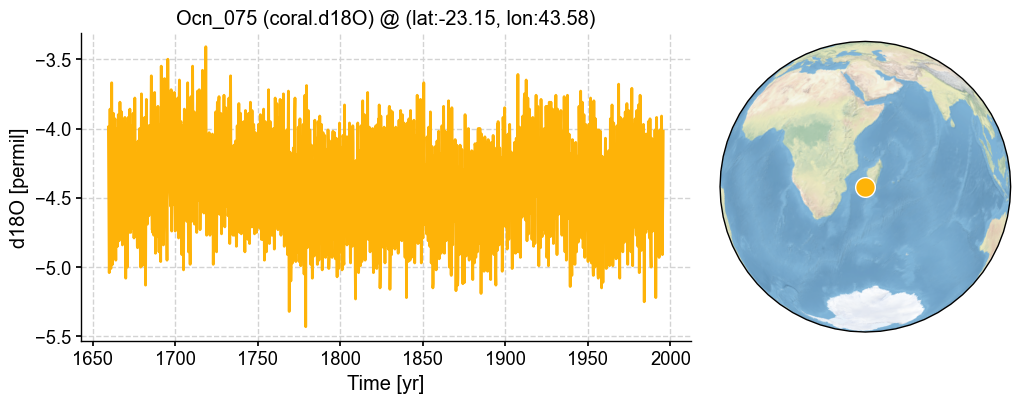

In [5]:
pobj = pdb.records['Ocn_075']
fig, ax = pobj.plot()

### Model

In [6]:
dirpath = './data'
model_tas = cfr.ClimateField().load_nc(os.path.join(dirpath, 'tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc'))

## Get climate data for a specific `ProxyRecord`

In [7]:
%%time

pobj.del_clim()
pobj.get_clim(model_tas, tag='model')

CPU times: user 4.86 ms, sys: 81.9 ms, total: 86.8 ms
Wall time: 861 ms


In [10]:
pobj.clim['model.tas'].da

<xarray.DataArray 'tas' (time: 13872)>
array([300.35977, 299.7687 , 299.38205, ..., 297.78134, 299.71677,
       300.90518], dtype=float32)
Coordinates:
  * time     (time) object 0850-01-17 00:00:00 ... 2005-12-17 00:00:00
    lat      float32 -23.68
    lon      float32 42.5
Attributes:
    long_name:  Reference height temperature
    units:      K

## Create a PSM object

In [11]:
mdl = cfr.psm.Linear(pobj)

In [12]:
mdl.calib_details = {
    'fitR2adj': 0.8,
    'PSMresid': 0.1,
    'PSMmse': 0.01,
    'SNR': 1,
    'seasonality': list(range(1, 13)),
}
mdl.model = 

In [14]:
pp = mdl.forward()

AttributeError: 'Linear' object has no attribute 'model'

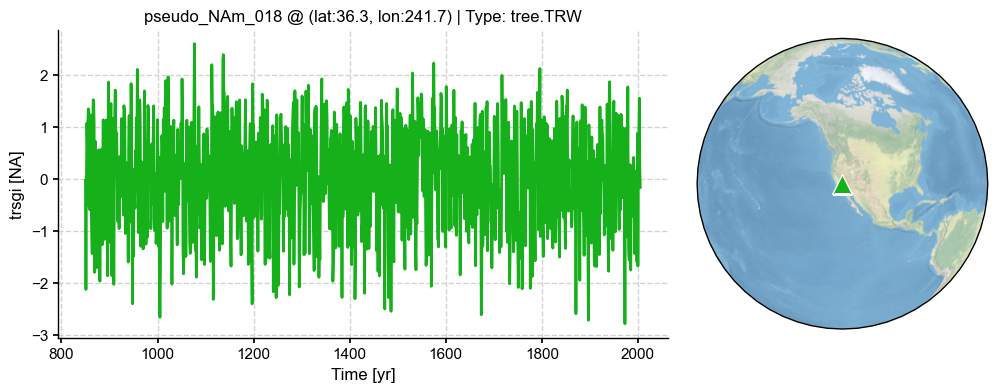

In [29]:
fig, ax = pp.plot()